In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(dados)

In [4]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
customer_df = pd.json_normalize(df['customer'])
df = pd.concat([df.drop('customer', axis=1), customer_df], axis=1)

In [6]:
phone_df = pd.json_normalize(df['phone'])
df = pd.concat([df.drop('phone', axis=1), phone_df], axis=1)

In [7]:
internet_df = pd.json_normalize(df['internet'])
df = pd.concat([df.drop('internet', axis=1), internet_df], axis=1)


In [8]:
account_df = pd.json_normalize(df['account'])
df = pd.concat([df.drop('account', axis=1), account_df], axis=1)


In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
for coluna in df.columns:
    print(coluna)
    print(df[coluna].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automati

In [13]:
df['Churn'] =df['Churn'].replace('', 'no info')

In [14]:
df['Churn'].unique()


array(['No', 'Yes', 'no info'], dtype=object)

In [15]:
df = df[df['Churn'] != 'no info'] 

'''Este código cria um novo DataFrame mantendo apenas as linhas onde a coluna 'Churn' não é igual 
a 'no info'. O operador != significa "diferente de", então estamos mantendo todas as linhas onde 'Churn' 
é diferente de 'no info'.'''

'Este código cria um novo DataFrame mantendo apenas as linhas onde a coluna \'Churn\' não é igual \na \'no info\'. O operador != significa "diferente de", então estamos mantendo todas as linhas onde \'Churn\' \né diferente de \'no info\'.'

In [16]:
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

In [17]:
df['Churn'] = df['Churn'].astype('boolean')

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('boolean')

In [19]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df['Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      shape=(6531,), dtype=object)

In [21]:
# # Calcula a porcentagem de valores vazios
# porcentagem_vazios = (df['Charges.Total'].isna().sum() / len(df)) * 100
# print(f"Porcentagem de valores vazios em Charges.Total: {porcentagem_vazios:.2f}%")

# Para ver a contagem absoluta também
contagem_vazios = df['Charges.Total'].isna().sum()
print(f"Quantidade de valores vazios: {contagem_vazios}")

Quantidade de valores vazios: 0


In [22]:
# Contagem de valores não vazios
contagem_nao_vazios = df['Charges.Total'].notna().sum()
print(f"Quantidade de valores preenchidos: {contagem_nao_vazios}")

Quantidade de valores preenchidos: 7043


In [23]:
espacos_apenas = df['Charges.Total'].str.strip().eq('').sum()
print(f"Quantidade de valores que são apenas espaços: {espacos_apenas}")


Quantidade de valores que são apenas espaços: 11


In [24]:
# Substituir strings vazias ou apenas espaços por NaN
df['Charges.Total'] = df['Charges.Total'].replace(r'^\s*$', float('nan'), regex=True)

In [25]:
# Agora converter para float64
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')


In [26]:
# Verificar a quantidade de valores NaN após a conversão
valores_nan = df['Charges.Total'].isna().sum()
print(f"Quantidade de valores NaN após conversão: {valores_nan}")


Quantidade de valores NaN após conversão: 11


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   boolean
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   boolean
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [28]:
df['Charges.Total'].isna().sum()

np.int64(11)

In [29]:
media = df['Charges.Total'].mean()
desv_pad = df['Charges.Total'].std()
print(f'Média: {media}')
print(f'Desvio padrão: {desv_pad}')

Média: 2283.3004408418656
Desvio padrão: 2266.771361883145


In [30]:
import numpy as np
# Gerar valores aleatórios com distribuição normal
valores_aleatorios = np.random.normal(media, desv_pad, size=df['Charges.Total'].isna().sum())

In [31]:
# Preencher os valores NaN com os valores aleatórios gerados
df.loc[df['Charges.Total'].isna(), 'Charges.Total'] = valores_aleatorios

In [32]:
# Verificar se ainda existem valores NaN
valores_nan_apos = df['Charges.Total'].isna().sum()
print(f"\nQuantidade de valores NaN após preenchimento: {valores_nan_apos}")


Quantidade de valores NaN após preenchimento: 0


In [33]:
# Verificar as novas estatísticas
print(f"\nNova média: {df['Charges.Total'].mean():.2f}")
print(f"Novo desvio padrão: {df['Charges.Total'].std():.2f}")


Nova média: 2281.17
Novo desvio padrão: 2266.44


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   boolean
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   boolean
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

### Até o momento os dados foram tratados, as colunas possuem os tipos adequaos. Foram excluídas as linhas que não possuíam informação sobre o churn, já que essa é uma informação fundamental para a análise e a coluna Charges.Total que possuía dados em branco foi tratada. Os dados faltantes form substítuídos por valores dentro da mesma média e desvio padrão.

In [35]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,False,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [36]:
proporcao_churn = df['Churn'].value_counts(normalize = True)

In [37]:
proporcao_churn

Churn
False    0.73463
True     0.26537
Name: proportion, dtype: Float64

In [38]:
proporcao_gender = df['gender'].value_counts(normalize = True)


In [39]:
proporcao_gender


gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

In [41]:
proporcao_senior = df['SeniorCitizen'].value_counts(normalize = True)
proporcao_senior

SeniorCitizen
False    0.837853
True     0.162147
Name: proportion, dtype: Float64

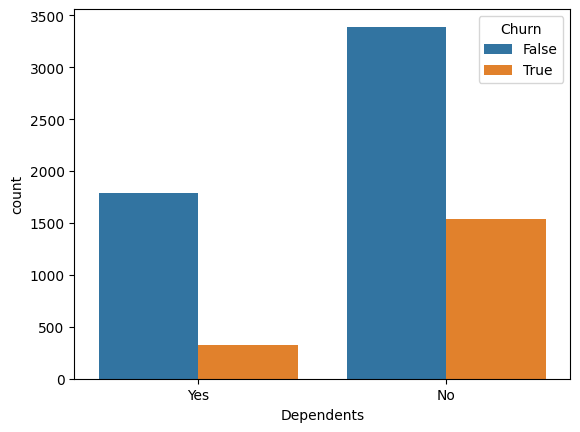

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

   # Exemplo de gráfico de barras
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.show()

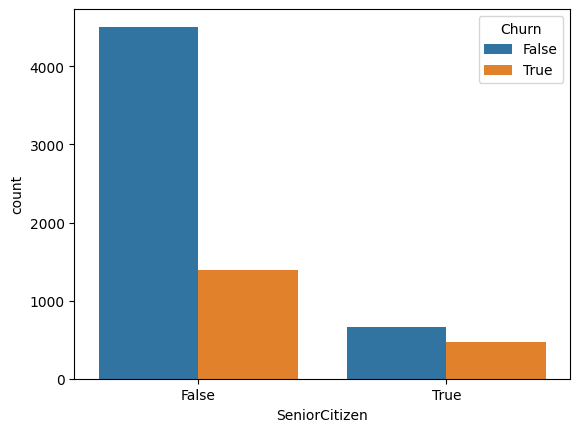

In [44]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.show()

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

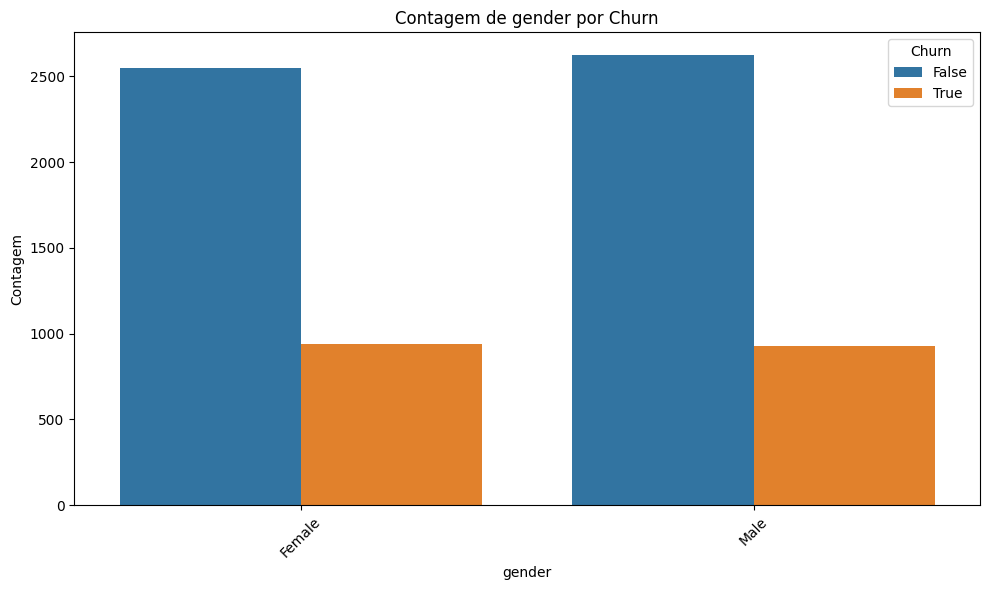

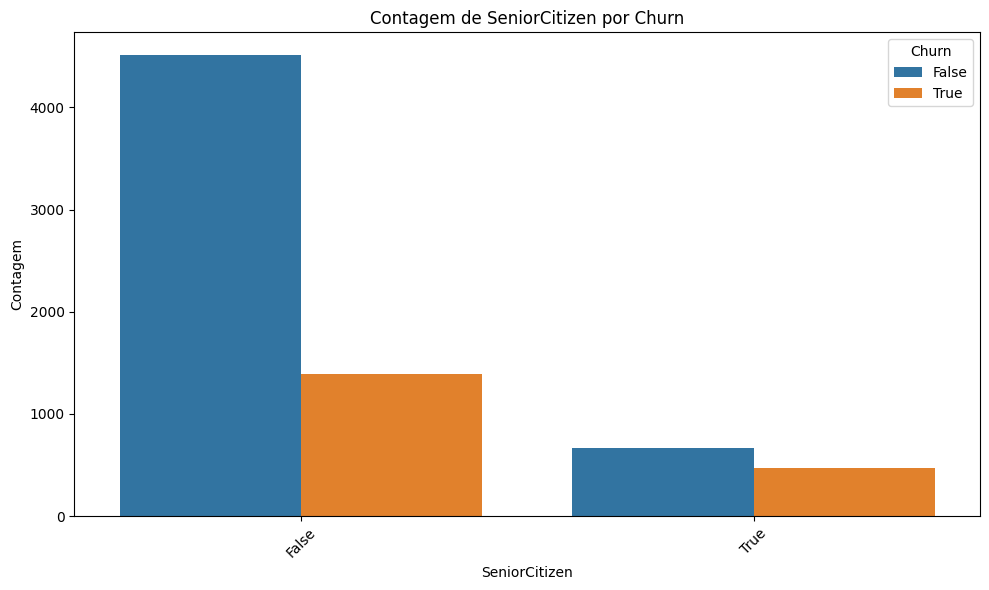

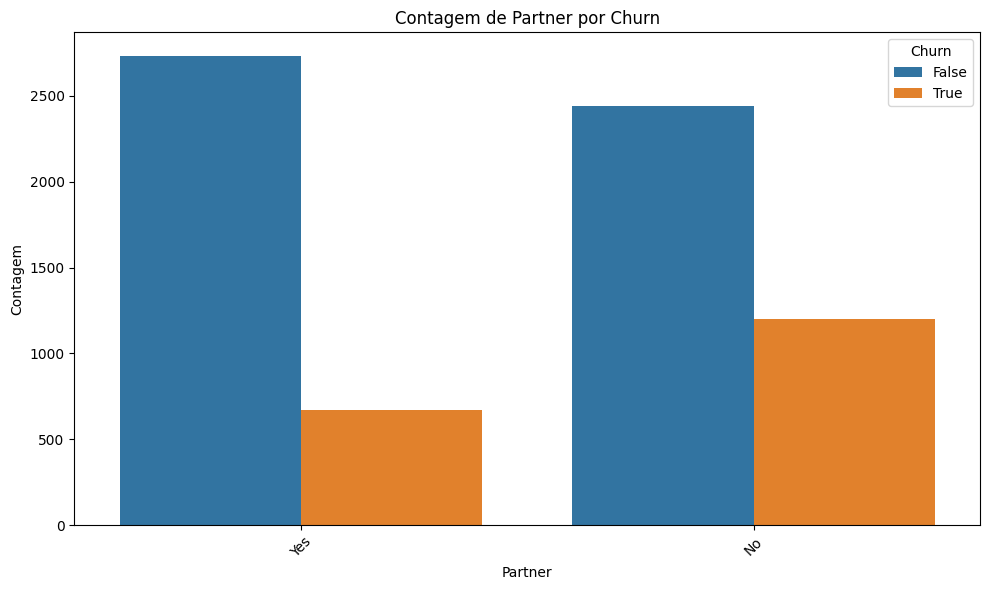

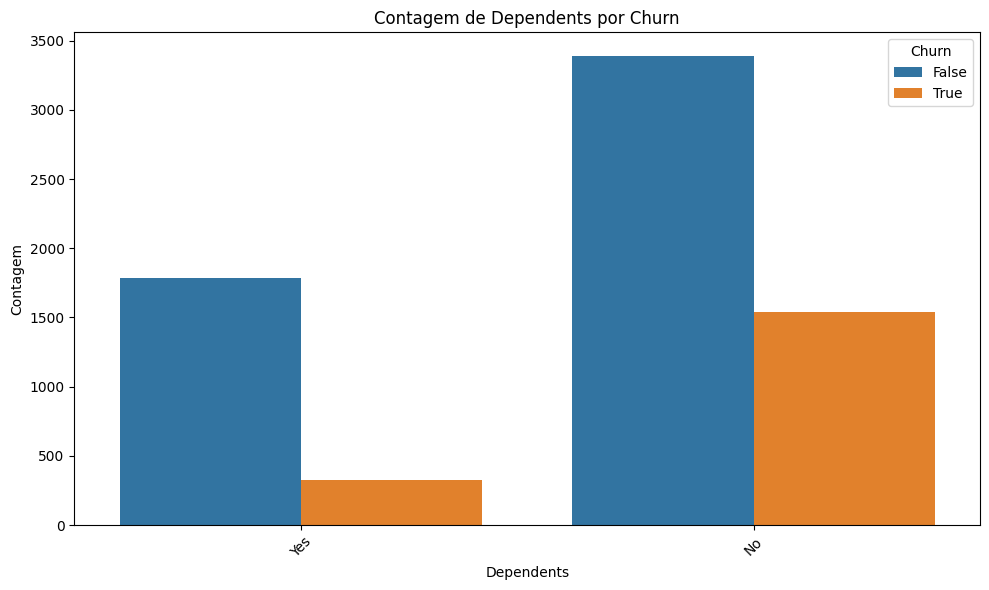

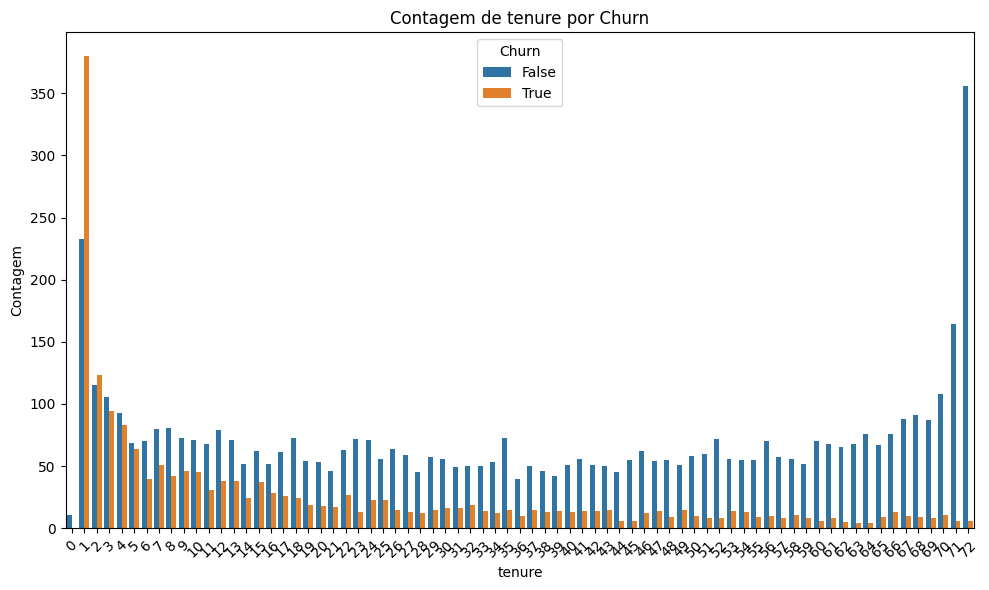

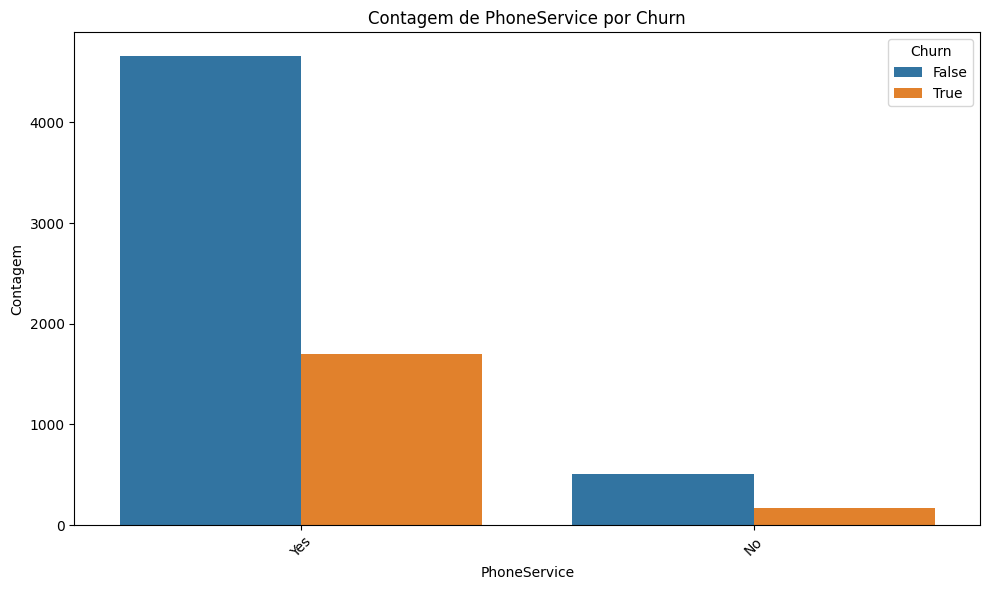

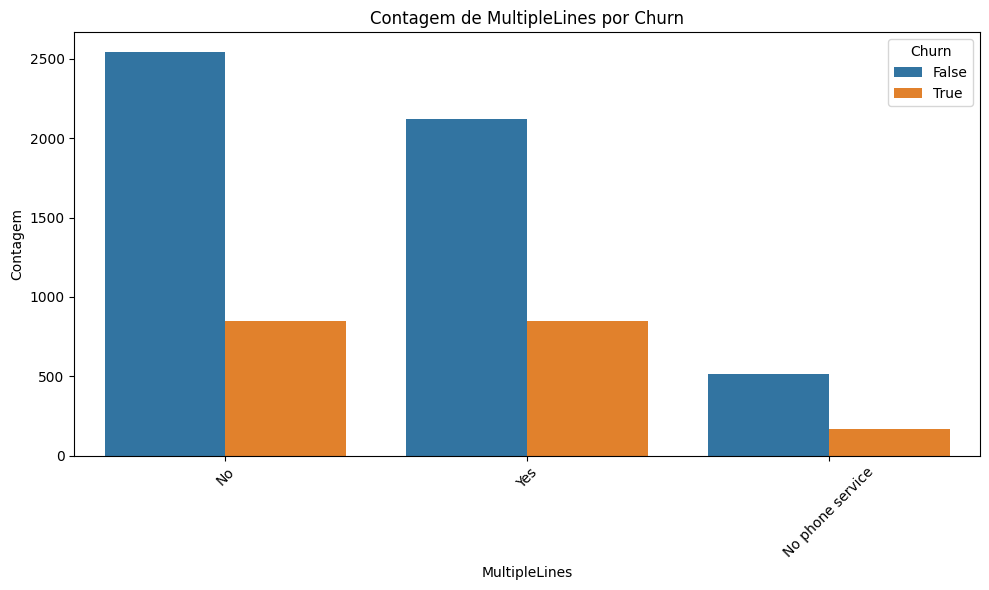

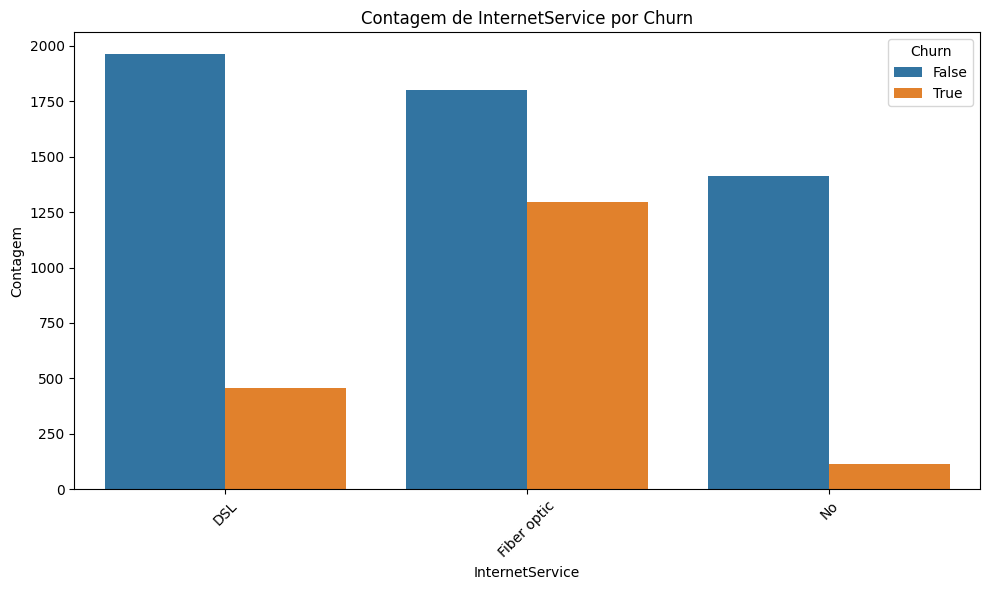

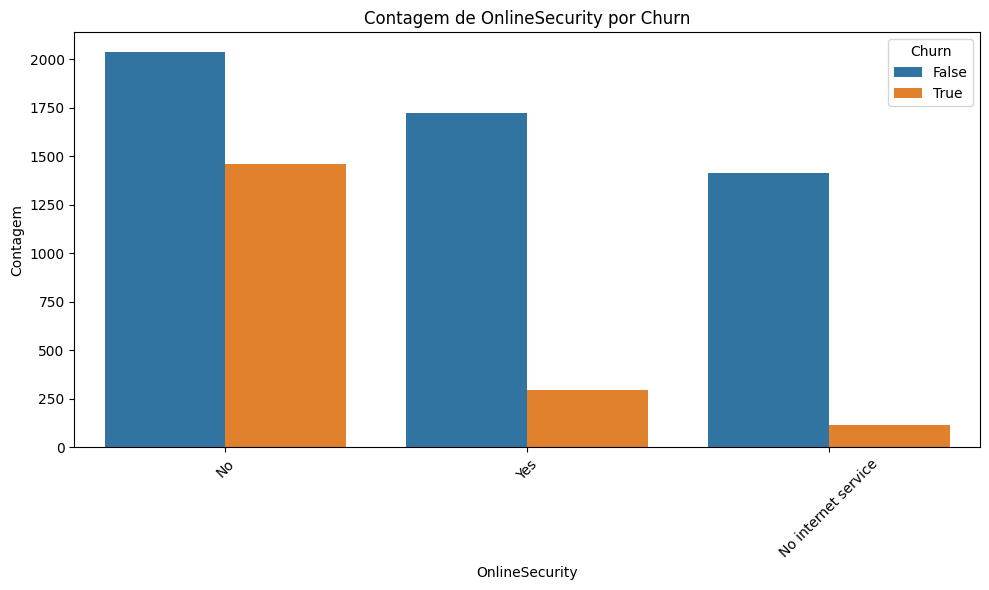

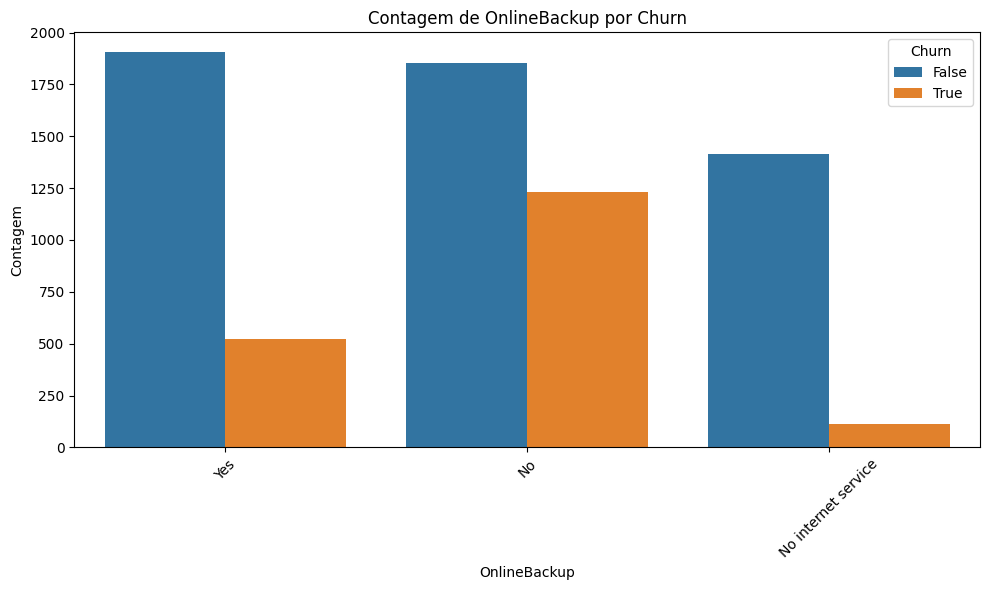

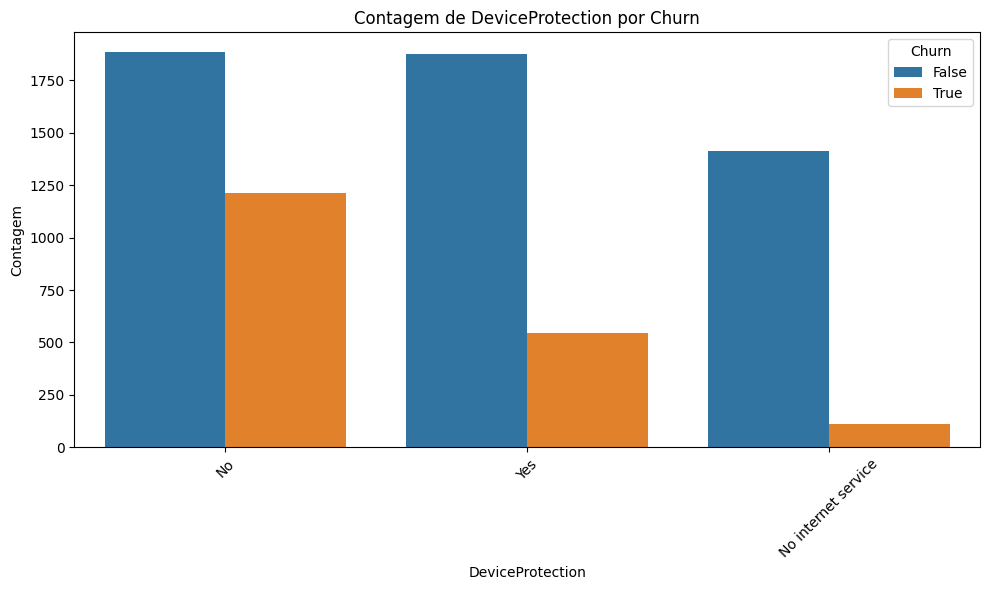

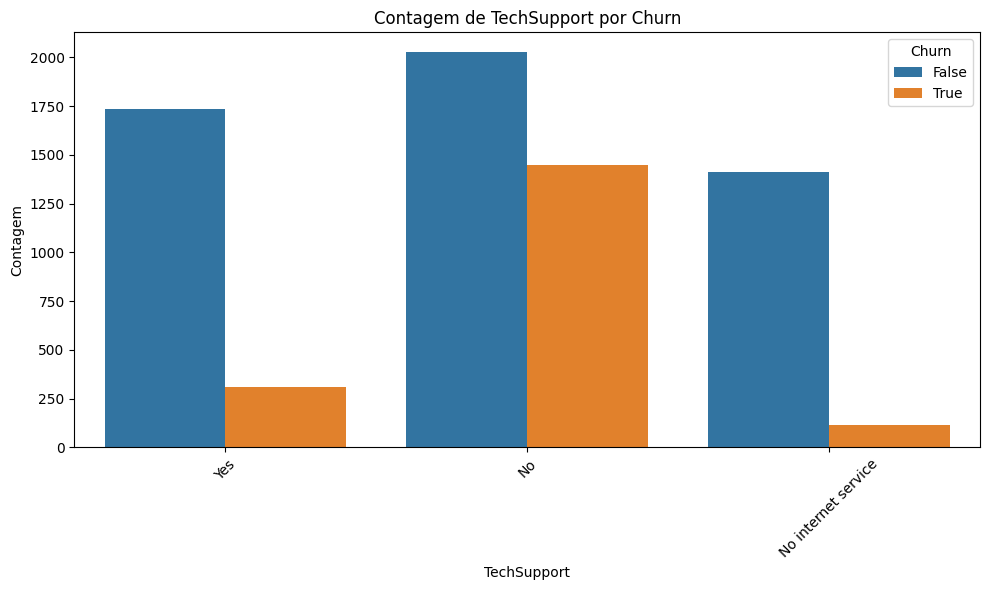

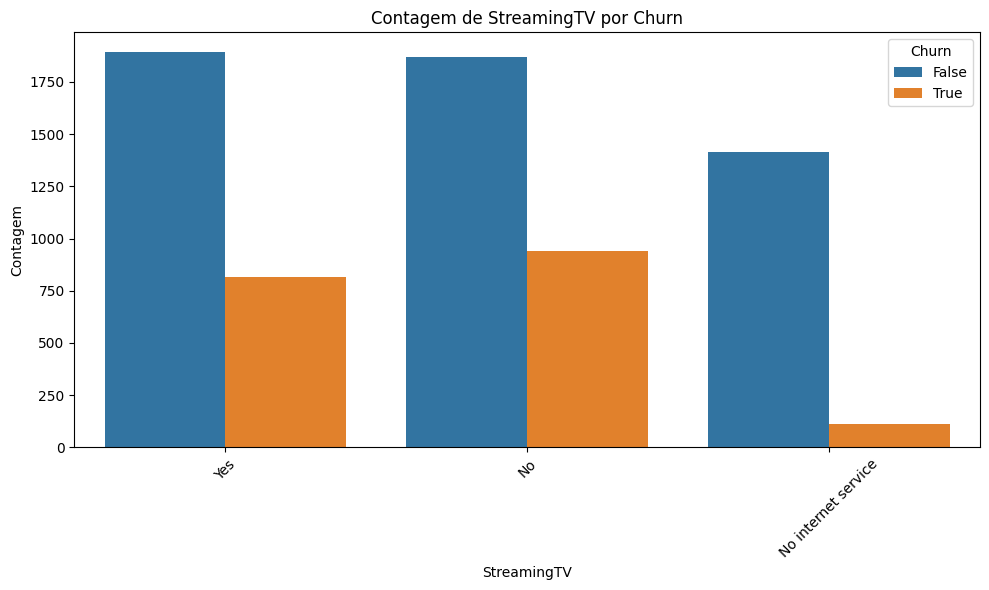

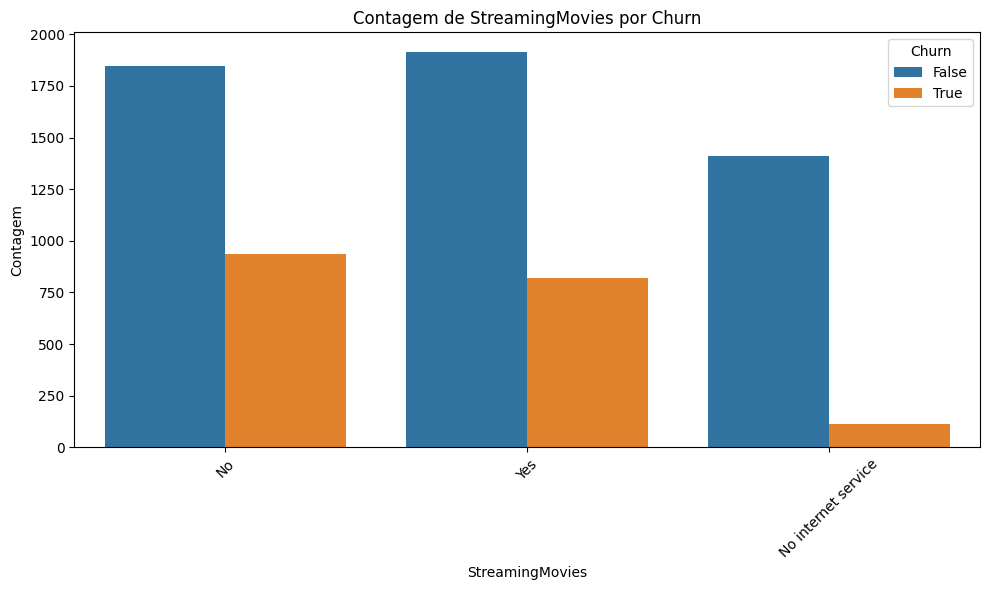

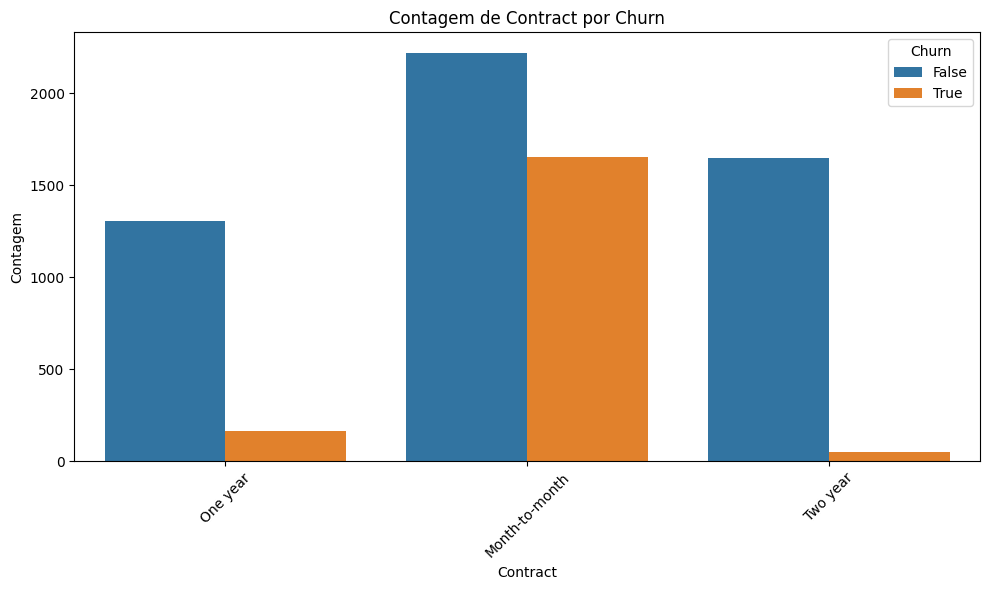

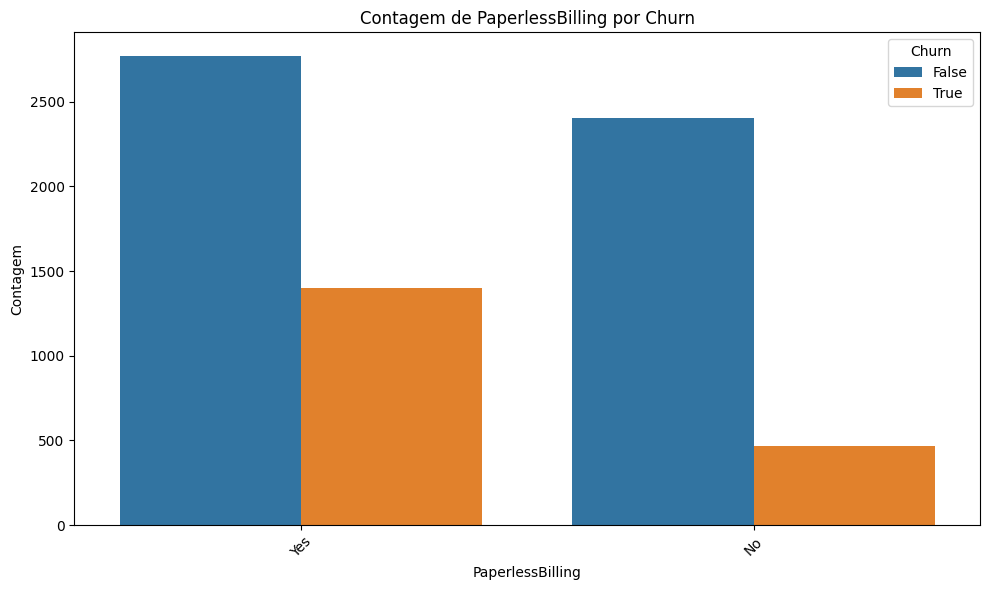

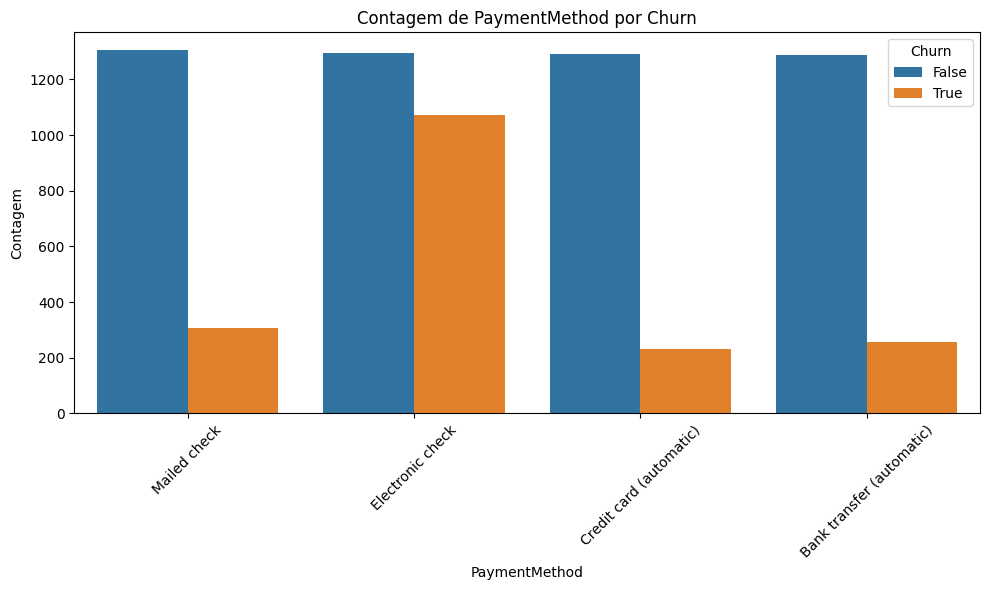

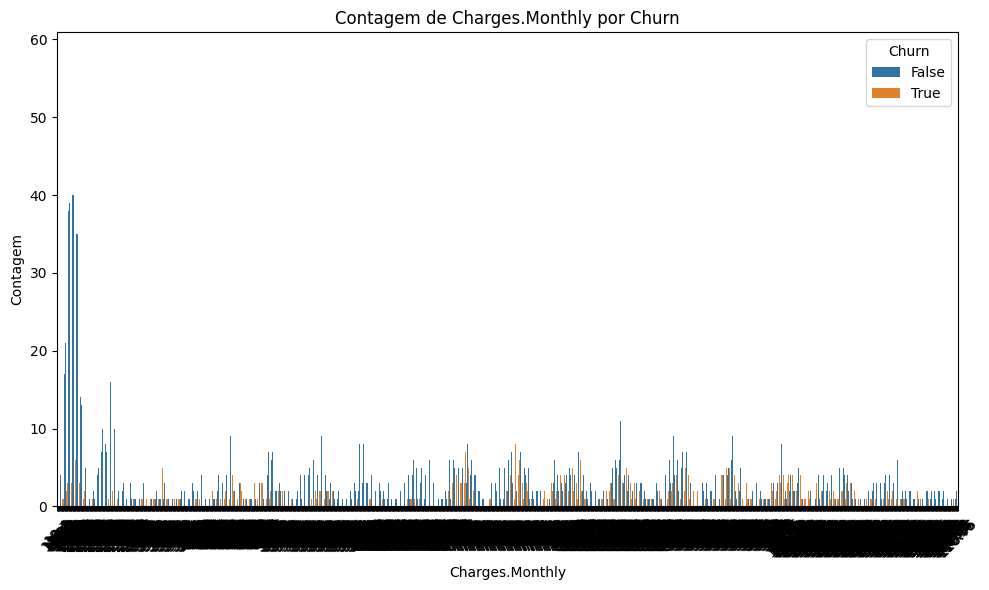

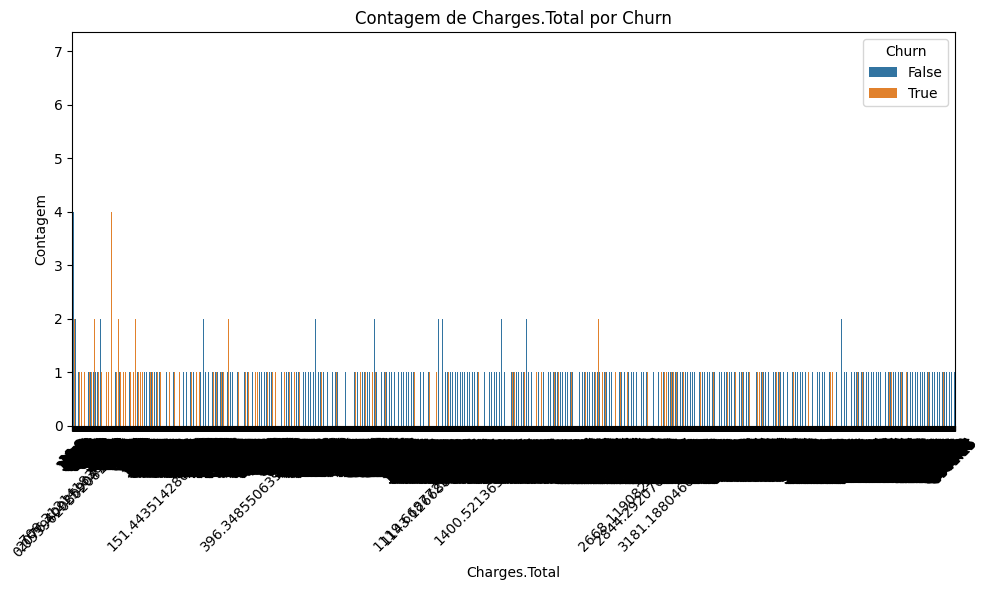

In [50]:
for coluna in df.columns:
    if coluna != 'Churn' and coluna != 'customerID':
        plt.figure(figsize = (10,6))
        sns.countplot(x=coluna,
                     hue='Churn',
                     data=df)
        plt.title(f'Contagem de {coluna} por Churn')
        plt.xlabel(coluna)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   boolean
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   boolean
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preparar os dados
X = df[['Charges.Monthly', 'Charges.Total']]  # Substitua com as colunas que deseja usar
y = df['Churn']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
print(model.score(X_test, y_test))

0.7821149751596878


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Preparar os dados
X = df[['Charges.Monthly', 'Charges.Total']]  # Mantendo as mesmas features para comparação
y = df['Churn']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dicionário para armazenar os modelos
models = {
    'Regressão Logística': LogisticRegression(),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Treinar e avaliar cada modelo
for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy:.4f}")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))


Regressão Logística:
Acurácia: 0.7821

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      1036
         1.0       0.63      0.42      0.51       373

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.68      1409
weighted avg       0.77      0.78      0.77      1409


Árvore de Decisão:
Acurácia: 0.7133

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1036
         1.0       0.46      0.46      0.46       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409


Random Forest:
Acurácia: 0.7722

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85      1036
         1.0       0.58      0.49      0.

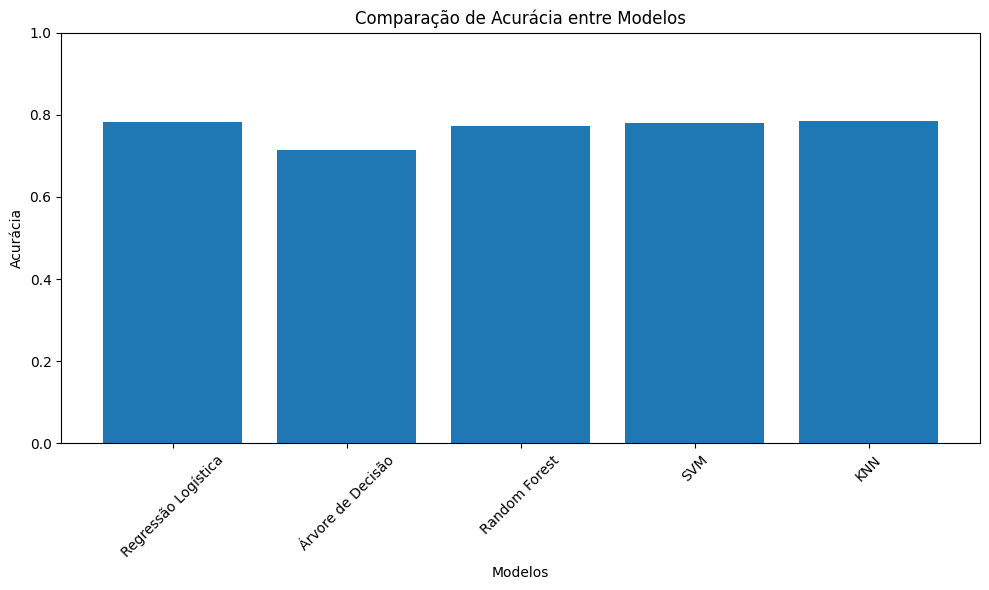

In [71]:
import matplotlib.pyplot as plt

# Armazenar as acurácias
accuracies = []
model_names = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    model_names.append(name)

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.title('Comparação de Acurácia entre Modelos')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()